# Problem 4
In this case we have 40 cities

Load all the necessary libraries and the algorithm

In [8]:
import tsplib95
import matplotlib.pyplot as plt
import networkx as nx
import importlib
imported_module = importlib.import_module("tsp_genetic_algorithm")
importlib.reload(imported_module)
from tsp_genetic_algorithm import TSP

Load the original TSP problem

In [9]:
original_problem = tsplib95.load('att48.tsp')

Reduce the problem from 48 to 40 cities

In [10]:
# Extract node coordinates for the first N cities
N = 40
reduced_nodes = {key: original_problem.node_coords[key] for key in list(original_problem.get_nodes())[:N]}

# Create a new TSP problem with only N cities
reduced_problem = tsplib95.models.StandardProblem(comment="Reduced TSP to " + str(N) + "cities")
reduced_problem.node_coords = reduced_nodes

Run the algorithm

In [11]:
tsp = TSP(reduced_problem, 220, 400, 0.3, 0.8, 'tournament_selection', 'partially_mapped_crossover', 'always_mutate')
tsp.run()

Initial fitness: 
9.35598138804517e-06
Fitness generation number 0: 
1.0830528804731809e-05
Fitness generation number 1: 
1.1247939729885864e-05
Fitness generation number 2: 
1.2627435470356453e-05
Fitness generation number 3: 
1.364084285969472e-05
Fitness generation number 4: 
1.4671954073187885e-05
Fitness generation number 5: 
1.5301157113313304e-05
Fitness generation number 6: 
1.707121055570284e-05
Fitness generation number 7: 
1.707121055570284e-05
Fitness generation number 8: 
1.7191136515054396e-05
Fitness generation number 9: 
1.7736310579801817e-05
Fitness generation number 10: 
1.8084453983458978e-05
Fitness generation number 11: 
1.8637906423214262e-05
Fitness generation number 12: 
1.912639748751053e-05
Fitness generation number 13: 
1.950612494258283e-05
Fitness generation number 14: 
1.9757014699412647e-05
Fitness generation number 15: 
2.00642194520723e-05
Fitness generation number 16: 
2.006760639777039e-05
Fitness generation number 17: 
2.0311809460422697e-05
Fitness

Create the plots

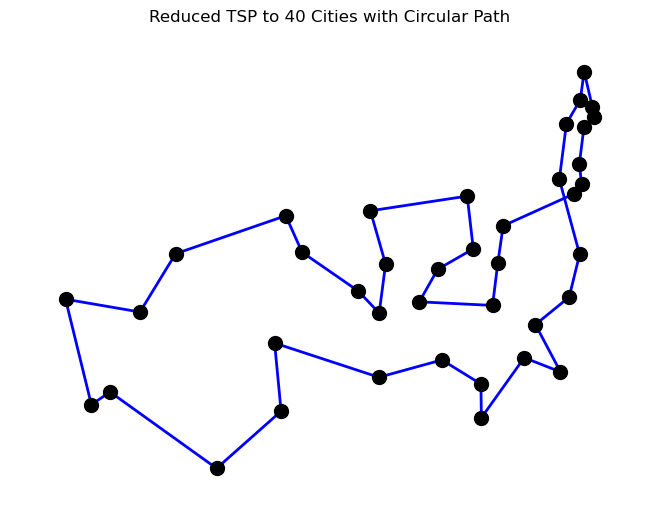

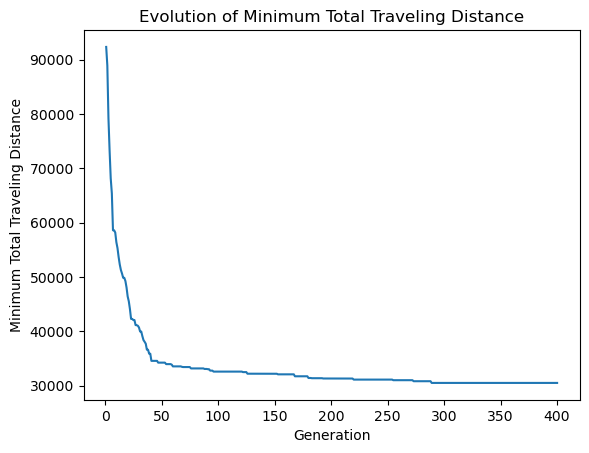

In [12]:
# Assuming reduced_nodes is a dictionary containing node coordinates

# Create a graph and add nodes
G = nx.Graph()
G.add_nodes_from(reduced_nodes.keys())

# Draw the nodes
pos = {node: (reduced_nodes[node][0], reduced_nodes[node][1]) for node in reduced_nodes}
nx.draw(G, pos, node_color='black', with_labels=False, node_size=100)

# Draw the circular path stored in tsp.elite[0]
elite_path = tsp.elite[0]  # Assuming tsp.elite[0] contains the circular path

# Add edges for the circular path
for i in range(len(elite_path) - 1):
    G.add_edge(elite_path[i], elite_path[i + 1])

# Connect the last and first nodes to complete the circular path
G.add_edge(elite_path[-1], elite_path[0])

# Draw the edges
nx.draw_networkx_edges(G, pos, edgelist=[(elite_path[i], elite_path[i + 1]) for i in range(len(elite_path) - 1)], edge_color='blue', width=2)
nx.draw_networkx_edges(G, pos, edgelist=[(elite_path[-1], elite_path[0])], edge_color='blue', width=2)

plt.title('Reduced TSP to ' + str(N) +' Cities with Circular Path')
plt.show()


plt.plot(range(1, len(tsp.evolution_data) + 1), tsp.evolution_data, linestyle='-')
plt.title('Evolution of Minimum Total Traveling Distance')
plt.xlabel('Generation')
plt.ylabel('Minimum Total Traveling Distance')
plt.show()